# Weather data analysis of Lahore for Last 30 years
As every one is talking about the envirmental changes and temprature rise in all over the world due to human influence and many other factors so in this study i am trying to figure out is there any change in temperature in last 30 years.
I get this data from PMD (Pakistan Meteorological Department) you can visit them [here](http://www.pmd.gov.pk/).

In [1]:
%matplotlib inline
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr

## Data Import 
First of all we have to import data in python the data contains 15 files with different variables so we are using glob to import all the data file paths in python then we will read the data from each path and append it in a dataframe as a variable.

In [2]:
window_home='C:/Users/dell/Dropbox/weather_analysis/data'
window_office='C:/Users/Top spot/Desktop/lahore-edit/*.TXT'
path_list=glob.glob('C:/Users/Top spot/Desktop/lahore-edit/*.TXT')
path_list

['C:/Users/Top spot/Desktop/lahore-edit\\FF2.TXT',
 'C:/Users/Top spot/Desktop/lahore-edit\\FF3.TXT',
 'C:/Users/Top spot/Desktop/lahore-edit\\N2.TXT',
 'C:/Users/Top spot/Desktop/lahore-edit\\N3.TXT',
 'C:/Users/Top spot/Desktop/lahore-edit\\PP2.TXT',
 'C:/Users/Top spot/Desktop/lahore-edit\\PP3.TXT',
 'C:/Users/Top spot/Desktop/lahore-edit\\PPP2.TXT',
 'C:/Users/Top spot/Desktop/lahore-edit\\PPP3.TXT',
 'C:/Users/Top spot/Desktop/lahore-edit\\RRR.TXT',
 'C:/Users/Top spot/Desktop/lahore-edit\\TNTN.TXT',
 'C:/Users/Top spot/Desktop/lahore-edit\\TXTX.TXT',
 'C:/Users/Top spot/Desktop/lahore-edit\\UU2.TXT',
 'C:/Users/Top spot/Desktop/lahore-edit\\UU3.TXT',
 'C:/Users/Top spot/Desktop/lahore-edit\\VP2.TXT',
 'C:/Users/Top spot/Desktop/lahore-edit\\VP3.TXT']

The following function takes the list of file paths and read the files and append the single file data as a new variable in dataframe and returns the dataframe with all variables that were persent in files.

In [3]:
def data_import(path_list):
    data=[pd.read_csv(x,header=None,sep='\s+',names=['years','01','02','03','04','05','06','07','08','09','10','11','12'],\
                      index_col=None,na_values='-100') for x in path_list]
    assert len(data)==len(path_list)
    new_list=[]
    i=0
    for frame in data:
        i =i+1
        name=path_list[i-1].rsplit('\\')[1].rsplit('.')[0].lower()
        frame.rename(columns={0:'years'}, inplace=True)
        frame=pd.melt(frame,id_vars=['years'],var_name='months',value_name='values')
        frame['date'] = frame['years'].map(str)+'-'+frame['months'].map(str)+'-'+'01'
        frame['date']=pd.to_datetime(frame['date'],format='%Y-%m-%d')
        frame=frame.sort_values(by='date')
        frame=frame[['date','values']]
        frame.rename(columns={'values':name},inplace=True)
        frame=frame.set_index('date')
        new_list.append(frame)
        df =pd.concat(new_list,axis=1,join_axes=[new_list[0].index])
    return df

In [4]:
dat=data_import(path_list)

In [5]:
dat.head()

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,
1985-01-01,0.4,2.0,NaN,3.1,992.9,991.3,NaN,NaN,NaN,NaN,20.2,85,46,9.3,9.5
1985-02-01,0.3,3.0,NaN,1.2,985.8,984.2,NaN,NaN,NaN,NaN,25.3,69,32,9.1,9.2
1985-03-01,1.4,3.9,NaN,4.4,985.9,983.7,NaN,NaN,NaN,NaN,30.8,58,30,12.4,11.4
1985-04-01,1.8,3.2,NaN,3.1,981.9,979.4,NaN,NaN,NaN,NaN,34.4,54,27,15.9,13.5
1985-05-01,2.2,4.1,NaN,2.1,977.6,974.9,NaN,NaN,NaN,NaN,40.5,37,17,15.3,11.5


Now as we have imported complete data in a dat dataframe with all variables we are using the abbrevations for the variables here used by PMD but we will change them with original variable names.

## Data Cleaning
The most important task after importing the data is data cleaning because every data needs to be cleaned before analysis and its the most difficult and time consuming part in data science.It involves the detection and removel of wrong observations from data.
Data can heve problems like
<br>
Missing values, 
<br>
Column names,
<br>
Outliers, 
<br>
Unexpected observations in columns,
<br>
Duplicate Rows,
<br>
Untidy Data.
<br>
The data was untidy so i had already deal that in data import function.But we will see other problem step by step. 

In [6]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 372 entries, 1985-01-01 to 2015-12-01
Data columns (total 15 columns):
ff2     371 non-null float64
ff3     371 non-null float64
n2      360 non-null float64
n3      372 non-null float64
pp2     372 non-null float64
pp3     372 non-null float64
ppp2    360 non-null float64
ppp3    360 non-null float64
rrr     360 non-null float64
tntn    360 non-null float64
txtx    372 non-null float64
uu2     372 non-null int64
uu3     372 non-null int64
vp2     372 non-null float64
vp3     372 non-null float64
dtypes: float64(13), int64(2)
memory usage: 46.5 KB


In [7]:
dat.head()

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,
1985-01-01,0.4,2.0,NaN,3.1,992.9,991.3,NaN,NaN,NaN,NaN,20.2,85,46,9.3,9.5
1985-02-01,0.3,3.0,NaN,1.2,985.8,984.2,NaN,NaN,NaN,NaN,25.3,69,32,9.1,9.2
1985-03-01,1.4,3.9,NaN,4.4,985.9,983.7,NaN,NaN,NaN,NaN,30.8,58,30,12.4,11.4
1985-04-01,1.8,3.2,NaN,3.1,981.9,979.4,NaN,NaN,NaN,NaN,34.4,54,27,15.9,13.5
1985-05-01,2.2,4.1,NaN,2.1,977.6,974.9,NaN,NaN,NaN,NaN,40.5,37,17,15.3,11.5


### Missing Observations
There were some missing observations with value '-100' in data which were replaced at the time of import with 'NAN'.Now From info and head we can see that there are missing observations in data so after studying the data we can see that many columns does not contain the data for year 1985 so completly remove this year from our data set.

In [8]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 372 entries, 1985-01-01 to 2015-12-01
Data columns (total 15 columns):
ff2     371 non-null float64
ff3     371 non-null float64
n2      360 non-null float64
n3      372 non-null float64
pp2     372 non-null float64
pp3     372 non-null float64
ppp2    360 non-null float64
ppp3    360 non-null float64
rrr     360 non-null float64
tntn    360 non-null float64
txtx    372 non-null float64
uu2     372 non-null int64
uu3     372 non-null int64
vp2     372 non-null float64
vp3     372 non-null float64
dtypes: float64(13), int64(2)
memory usage: 46.5 KB


In [9]:
dat.drop(dat['1985-01':'1985-12'].index,inplace=True)

After removing the 1985 year from data we are checking any other missing observation in data set.So there are two variables that have missing observations and we will replace them with their mean's.

In [10]:
dat.notnull().all()

ff2     False
ff3     False
n2       True
n3       True
pp2      True
pp3      True
ppp2     True
ppp3     True
rrr      True
tntn     True
txtx     True
uu2      True
uu3      True
vp2      True
vp3      True
dtype: bool

In [11]:
dat[dat.ff2.isnull()]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,
1990-07-01,NaN,NaN,4.8,4.5,973.9,971.3,997.7,994.6,181.5,26.8,35.4,75,59,30.7,32.1


In [12]:
dat.ix[dat.ff2.isnull(),'ff2']=dat.ff2.median()
#dat['ff2']=dat.ff2.fillna(dat.ff2.mean())

In [13]:
dat[dat.ff3.isnull()]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,
1990-07-01,1.1,NaN,4.8,4.5,973.9,971.3,997.7,994.6,181.5,26.8,35.4,75,59,30.7,32.1


In [14]:
dat.ix[dat.ff3.isnull(),'ff3']=dat.ff3.median()

In [15]:
dat.notnull().all().all()

True

### Unexpected Observations
Now we will test the presence of any unexpected/wrong observation in data.So by testing the condition on complete data set we can see that the condition is false so there are one or more columns that have values less then 0 which is not possible so we have to find and remove them from data.

In [16]:
(dat>0).all().all()

False

In [17]:
dat[(dat.ff2<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


In [18]:
dat[(dat.ff3<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


In [19]:
dat[(dat.n2<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


In [20]:
dat[(dat.n3<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


In [21]:
dat[(dat.pp2<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


In [22]:
dat[(dat.pp3<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


In [23]:
dat[(dat.ppp2<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


In [24]:
dat[(dat.ppp3<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


so only rrr which is monthly rain column have some unexpected observations so we will remove them with nan and then we will replace them with mean.

In [25]:
dat[(dat.rrr<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,
1991-01-01,0.2,1.3,2.5,2.5,993.4,991.2,1019.4,1016.3,-1.0,6.4,19.9,81,43,9.0,9.0
1991-12-01,0.2,0.8,3.1,3.8,993.0,990.7,1018.8,1015.7,-1.0,8.8,22.3,86,55,11.5,12.6
1996-12-01,0.0,0.2,1.6,1.2,993.5,991.5,1019.4,1016.4,-1.0,7.2,23.0,71,41,8.3,9.2
1998-01-01,0.1,1.4,2.7,3.5,992.7,991.3,1018.6,1016.4,-1.0,7.3,19.6,83,44,9.4,8.9
1999-11-01,0.2,1.0,1.2,1.3,990.1,988.1,1015.3,1012.5,-1.0,14.4,28.2,73,43,13.5,14.1
2000-12-01,0.3,0.3,1.3,1.6,991.5,989.7,1017.2,1014.6,-1.0,8.6,23.3,77,41,9.4,9.7
2001-10-01,0.4,1.4,0.3,0.4,985.8,983.3,1010.3,1007.0,-1.0,21.4,33.2,71,44,20.3,20.1
2001-11-01,0.5,1.0,0.4,0.5,990.6,988.5,1015.8,1012.9,-1.0,14.3,28.0,76,43,13.5,13.8
2005-11-01,0.7,1.3,0.2,0.8,990.8,988.7,1016.1,1013.0,-1.0,13.8,27.1,71,40,12.2,12.4


In [26]:
dat.ix[dat.rrr<0,'rrr']=np.nan

In [27]:
dat.ix[dat.rrr.isnull(),'rrr']=dat.rrr.mean()

In [28]:
dat[dat.rrr.isnull()]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


In [29]:
dat[(dat.tntn<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


In [30]:
dat[(dat.txtx<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


In [31]:
dat[(dat.uu2<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


In [32]:
dat[(dat.uu3<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


In [33]:
dat[(dat.vp2<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


In [34]:
dat[(dat.vp3<0)]

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,


In [35]:
dat.head()

,ff2,ff3,n2,n3,pp2,pp3,ppp2,ppp3,rrr,tntn,txtx,uu2,uu3,vp2,vp3
date,,,,,,,,,,,,,,,
1986-01-01,0.3,0.6,1.4,2.1,993.3,991.5,1019.5,1016.6,5.3,5.6,20.5,89,44,8.7,9.3
1986-02-01,0.2,3.6,2.7,3.1,991.0,989.1,1016.7,1013.9,43.0,9.0,22.4,82,44,10.7,10.5
1986-03-01,1.3,3.5,3.1,3.5,987.4,985.3,1012.5,1009.5,22.6,13.9,27.1,72,39,13.4,12.8
1986-04-01,2.2,4.3,2.6,3.0,982.9,980.7,1007.3,1004.4,14.8,18.9,34.0,51,27,14.4,13.2
1986-05-01,1.7,3.9,2.1,2.6,979.6,976.9,1003.7,1000.2,20.5,22.0,37.3,49,27,17.2,14.8


### Column Names
<br>
Now we will replace the column names with the original names.where
<br>
ff2 = Wind Speed At Morning 
<br>
ff3 = Wind Speed At Evening
<br>
n2 = Cloud At Morning
<br>
n3 = Cloud At Evening
<br>
pp2 = Atmospheric Pressure At Station At Morning
<br>
pp3 = Atmospheric Pressure At Station At Evening
<br>
ppp2 = Atmospheric Pressure At Sea At Morning
<br>
ppp3 = Atmospheric Pressure At Sea At Evening
<br>
rrr = Monthly Total Rain
<br>
tntn = Mean Min Temprature
<br>
txtx = Mean Max Temprature
<br>
uu2 = Humidity Morning
<br>
uu3 = Humidity Evening
<br>
vp2 = Vapour Pressure Morning
<br>
Vp3 = Vapour Pressure Evening
<br>

In [36]:
dat.rename(columns={'ff2':'windSpeedM','ff3':'windSpeedE','n2':'cloudM','n3':'cloudE',\
                    'pp2':'atmPressureStationM','pp3':'atmPressureStationE','ppp2':'atmPressureSeaM',\
                    'ppp3':'atmPressureSeaE','rrr':'monthlyTotalRain','tntn':'meanMinTemp',\
                    'txtx':'meanMaxTemp','uu2':'humidityM','uu3':'humidityE','vp2':'vapourPressureM',\
                    'vp3':'vapourPressureE'},inplace=True)

In [37]:
dat.head()

,windSpeedM,windSpeedE,cloudM,cloudE,atmPressureStationM,atmPressureStationE,atmPressureSeaM,atmPressureSeaE,monthlyTotalRain,meanMinTemp,meanMaxTemp,humidityM,humidityE,vapourPressureM,vapourPressureE
date,,,,,,,,,,,,,,,
1986-01-01,0.3,0.6,1.4,2.1,993.3,991.5,1019.5,1016.6,5.3,5.6,20.5,89,44,8.7,9.3
1986-02-01,0.2,3.6,2.7,3.1,991.0,989.1,1016.7,1013.9,43.0,9.0,22.4,82,44,10.7,10.5
1986-03-01,1.3,3.5,3.1,3.5,987.4,985.3,1012.5,1009.5,22.6,13.9,27.1,72,39,13.4,12.8
1986-04-01,2.2,4.3,2.6,3.0,982.9,980.7,1007.3,1004.4,14.8,18.9,34.0,51,27,14.4,13.2
1986-05-01,1.7,3.9,2.1,2.6,979.6,976.9,1003.7,1000.2,20.5,22.0,37.3,49,27,17.2,14.8


I am going to transform the variables for morning and evening to only single variable. We can also say this feature engineering.

In [38]:
dat['temp']=dat[['meanMinTemp','meanMaxTemp']].apply(lambda x: np.mean(x),axis=1)

In [39]:
dat['windSpeed']=dat[['windSpeedM','windSpeedE']].apply(lambda x: np.mean(x),axis=1)

In [40]:
dat['cloud'] = dat[['cloudM','cloudE']].apply(lambda x: np.mean(x),axis=1)

In [41]:
dat['atmPressureStation'] = dat[['atmPressureStationM','atmPressureStationE']].apply(lambda x: np.mean(x),axis=1)

In [42]:
dat['atmPressureSea'] = dat[['atmPressureSeaM','atmPressureSeaE']].apply(lambda x: np.mean(x),axis=1)

In [43]:
dat['humidity'] = dat[['humidityM','humidityE']].apply(lambda x: np.mean(x),axis=1)

In [44]:
dat['vapourPressure'] = dat[['vapourPressureM','vapourPressureE']].apply(lambda x: np.mean(x),axis=1)

In [45]:
dat.drop(['windSpeedM','windSpeedE','cloudM','cloudE','atmPressureStationM','atmPressureStationE','atmPressureSeaM',\
          'atmPressureSeaE','humidityM','humidityE','vapourPressureM','vapourPressureE','meanMinTemp','meanMaxTemp'],axis=1,inplace=True)

In [46]:
dat.head()

,monthlyTotalRain,temp,windSpeed,cloud,atmPressureStation,atmPressureSea,humidity,vapourPressure
date,,,,,,,,
1986-01-01,5.3,13.05,0.45,1.75,992.40,1018.05,66.5,9.0
1986-02-01,43.0,15.70,1.90,2.90,990.05,1015.30,63.0,10.6
1986-03-01,22.6,20.50,2.40,3.30,986.35,1011.00,55.5,13.1
1986-04-01,14.8,26.45,3.25,2.80,981.80,1005.85,39.0,13.8
1986-05-01,20.5,29.65,2.80,2.35,978.25,1001.95,38.0,16.0


In [47]:
dat.describe()

,monthlyTotalRain,temp,windSpeed,cloud,atmPressureStation,atmPressureSea,humidity,vapourPressure
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,58.340762,24.806389,1.819306,2.404861,983.164306,1007.429167,57.576389,18.685972
std,82.475687,6.990198,0.988159,1.214512,6.780599,7.550799,13.244976,7.694602
min,0.000000,10.900000,0.000000,0.000000,971.200000,994.300000,26.500000,8.400000
25%,7.000000,18.975000,1.000000,1.450000,976.300000,999.800000,48.875000,12.225000
50%,28.400000,26.525000,1.900000,2.375000,984.200000,1008.450000,61.000000,15.800000
75%,64.900000,31.050000,2.512500,3.150000,989.262500,1014.312500,67.500000,25.525000
max,640.000000,35.250000,4.050000,5.900000,993.900000,1019.450000,81.500000,34.150000


In [48]:
def outlier(col,df=dat):
    plt.subplot(2,2,1)
    sns.swarmplot(y=col,data=df)
    plt.subplot(2,2,2)
    sns.boxplot(y=col,data=df)
    plt.subplot(2,2,3)
    sns.violinplot(y=col,data=df)
    plt.subplot(2,2,4)
    sns.violinplot(y=col,data=df,inner=None,color='lightgray')
    sns.stripplot(y=col,data=df,jitter=True,size=4)
    plt.tight_layout()
    plt.show()

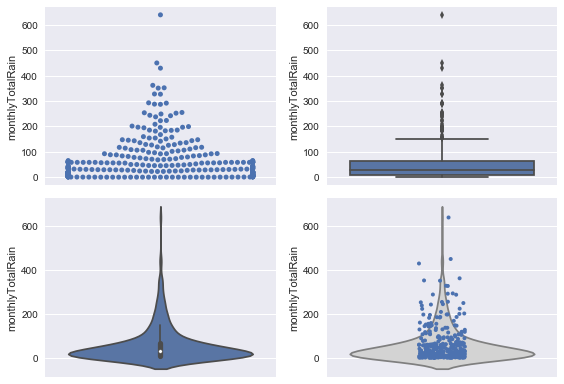

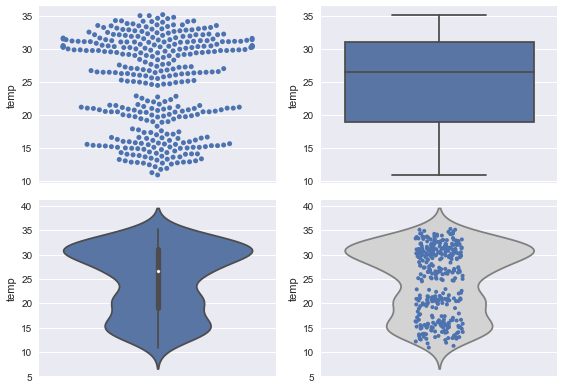

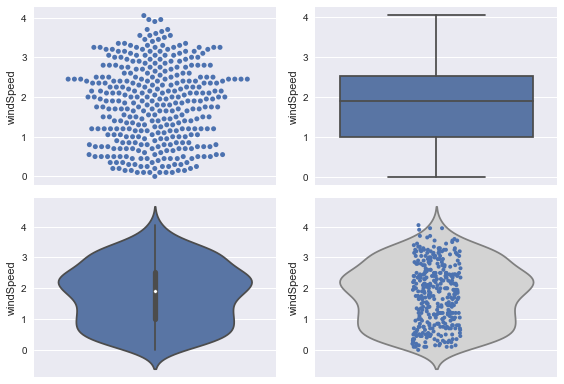

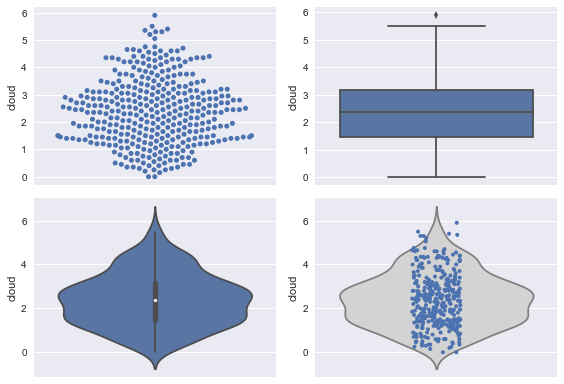

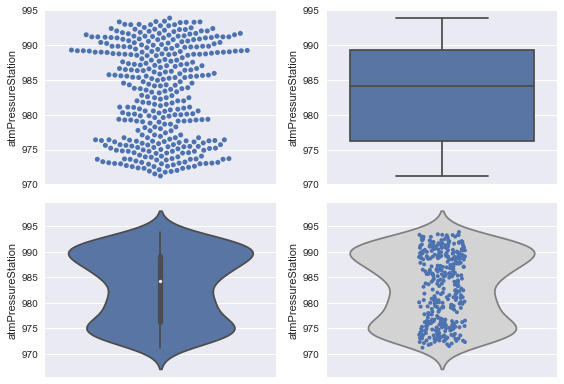

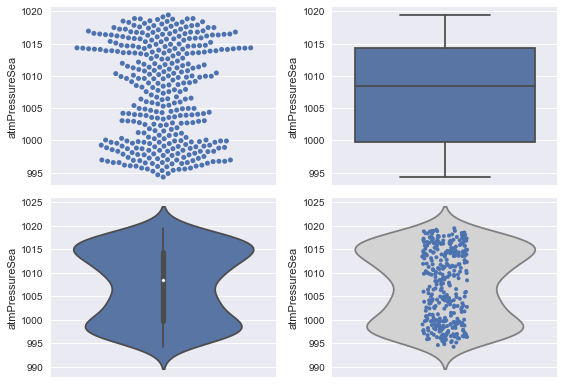

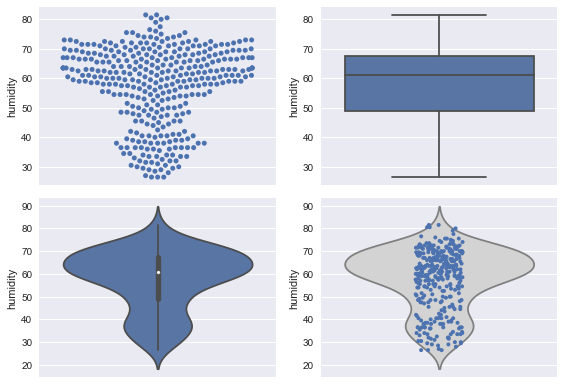

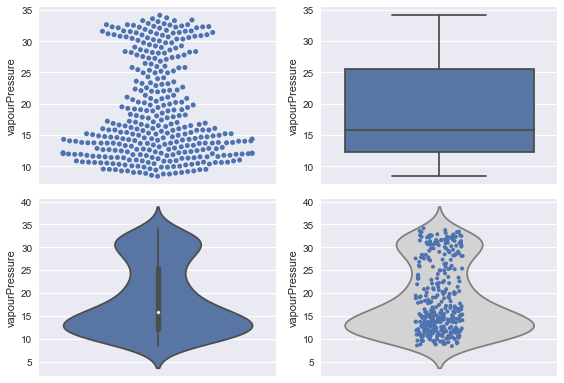

monthlyTotalRain      None
temp                  None
windSpeed             None
cloud                 None
atmPressureStation    None
atmPressureSea        None
humidity              None
vapourPressure        None
dtype: object

In [49]:
dat.apply(outlier)

There are many other methods to remove outliers from data but i will use Z-score and ModifiedZ-score.But most of Data scientists prefer Modified Z scores on Z score method. 

In [50]:
def outliers_z_score(ys):
    threshold = 3

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)

In [51]:
outliers_z_score(dat['monthlyTotalRain'])

(array([115, 127, 138, 139, 174, 331, 344, 354], dtype=int64),)

In [52]:
def outliers_modified_z_score(ys):
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / float(median_absolute_deviation_y)
                         for y in ys]
    return ys[np.abs(modified_z_scores) > threshold].values

In [53]:
out=outliers_modified_z_score(dat['monthlyTotalRain'])

In [54]:
dat.ix[dat.monthlyTotalRain.isin(out),'monthlyTotalRain']=np.median(dat.monthlyTotalRain)

In [55]:
dat.ix[dat.monthlyTotalRain.isin(out),'monthlyTotalRain']

Series([], Name: monthlyTotalRain, dtype: float64)

In [56]:
dat.monthlyTotalRain.describe()

count    360.000000
mean      35.845485
std       37.336027
min        0.000000
25%        7.000000
50%       28.350000
75%       56.225000
max      159.800000
Name: monthlyTotalRain, dtype: float64

In [57]:
dat.describe()

,monthlyTotalRain,temp,windSpeed,cloud,atmPressureStation,atmPressureSea,humidity,vapourPressure
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,35.845485,24.806389,1.819306,2.404861,983.164306,1007.429167,57.576389,18.685972
std,37.336027,6.990198,0.988159,1.214512,6.780599,7.550799,13.244976,7.694602
min,0.000000,10.900000,0.000000,0.000000,971.200000,994.300000,26.500000,8.400000
25%,7.000000,18.975000,1.000000,1.450000,976.300000,999.800000,48.875000,12.225000
50%,28.350000,26.525000,1.900000,2.375000,984.200000,1008.450000,61.000000,15.800000
75%,56.225000,31.050000,2.512500,3.150000,989.262500,1014.312500,67.500000,25.525000
max,159.800000,35.250000,4.050000,5.900000,993.900000,1019.450000,81.500000,34.150000


In [58]:
dat.columns

Index([u'monthlyTotalRain', u'temp', u'windSpeed', u'cloud',
       u'atmPressureStation', u'atmPressureSea', u'humidity',
       u'vapourPressure'],
      dtype='object')

In [59]:
'meanMinTemp' in ['meanMinTemp','meanMaxTemp']

True

In [60]:
def normalize(df):
    result=df.copy(deep=True)
    for col in df.columns:
        if col not in ['temp']:
            min_value=df[col].min()
            max_value=df[col].max()
            result[col] = (df[col] - min_value) / (max_value - min_value)
        else:
            print col+ ' is dependent valriable'
    return result
df=normalize(dat)

temp is dependent valriable


In [61]:
df.head()

,monthlyTotalRain,temp,windSpeed,cloud,atmPressureStation,atmPressureSea,humidity,vapourPressure
date,,,,,,,,
1986-01-01,0.033166,13.05,0.111111,0.296610,0.933921,0.944334,0.727273,0.023301
1986-02-01,0.269086,15.70,0.469136,0.491525,0.830396,0.834990,0.663636,0.085437
1986-03-01,0.141427,20.50,0.592593,0.559322,0.667401,0.664016,0.527273,0.182524
1986-04-01,0.092616,26.45,0.802469,0.474576,0.466960,0.459245,0.227273,0.209709
1986-05-01,0.128285,29.65,0.691358,0.398305,0.310573,0.304175,0.209091,0.295146


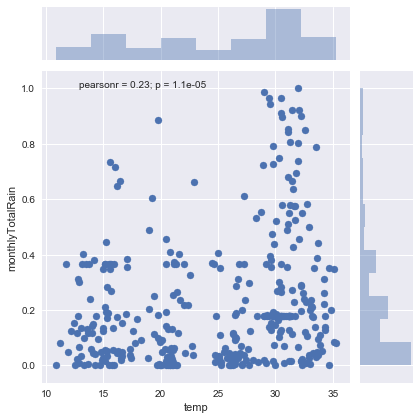

In [62]:
sns.jointplot(x='temp',y='monthlyTotalRain',data=df)

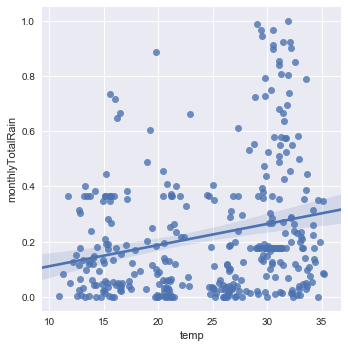

In [63]:
sns.lmplot(x='temp',y='monthlyTotalRain',data=df)

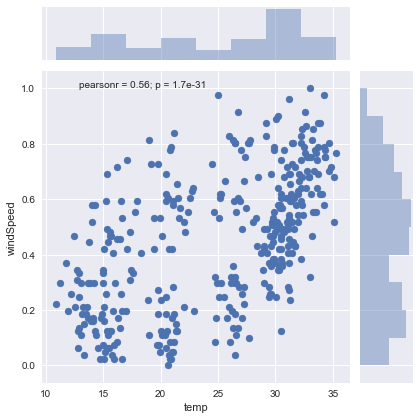

In [64]:
sns.jointplot(x='temp',y='windSpeed',data=df)

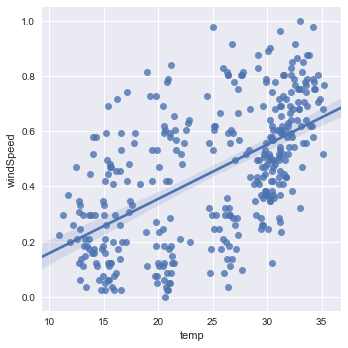

In [65]:
sns.lmplot(x='temp',y='windSpeed',data=df)

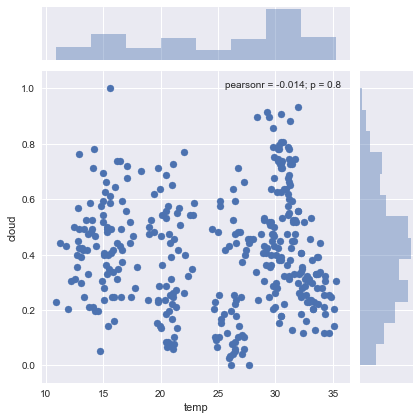

In [66]:
sns.jointplot(x='temp',y='cloud',data=df)

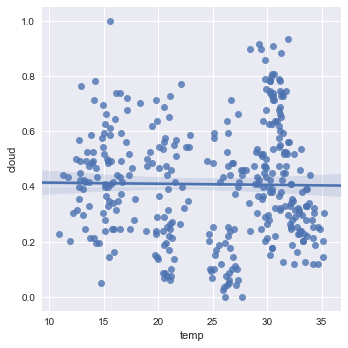

In [67]:
sns.lmplot(x='temp',y='cloud',data=df)

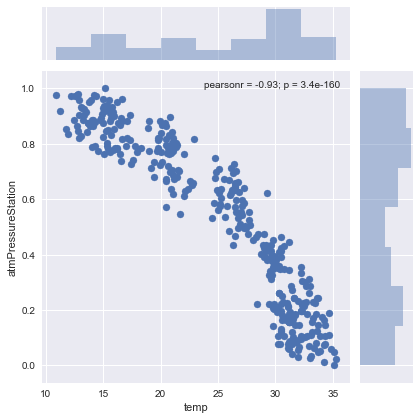

In [68]:
sns.jointplot(x='temp',y='atmPressureStation',data=df)

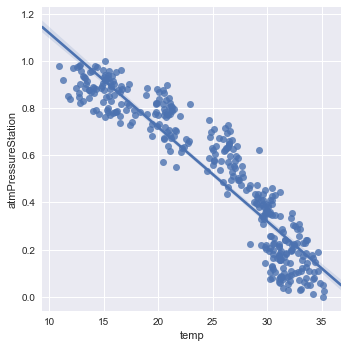

In [69]:
sns.lmplot(x='temp',y='atmPressureStation',data=df)

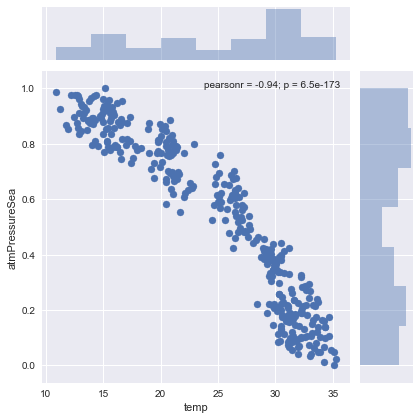

In [70]:
sns.jointplot(x='temp',y='atmPressureSea',data=df)

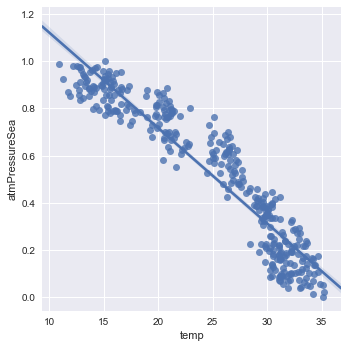

In [71]:
sns.lmplot(x='temp',y='atmPressureSea',data=df)

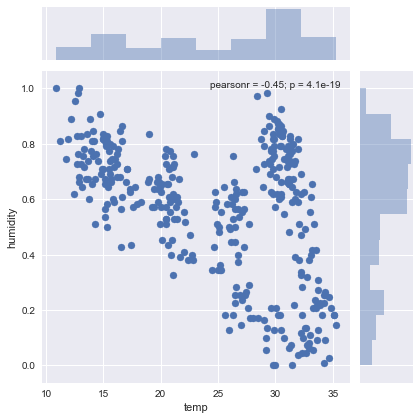

In [72]:
sns.jointplot(x='temp',y='humidity',data=df)

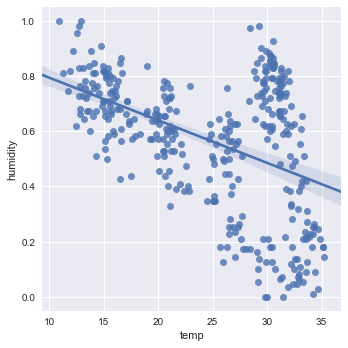

In [73]:
sns.lmplot(x='temp',y='humidity',data=df)

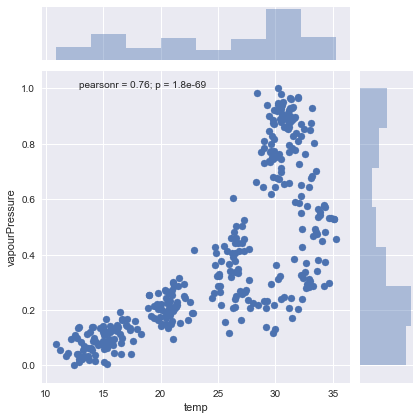

In [74]:
sns.jointplot(x='temp',y='vapourPressure',data=df)

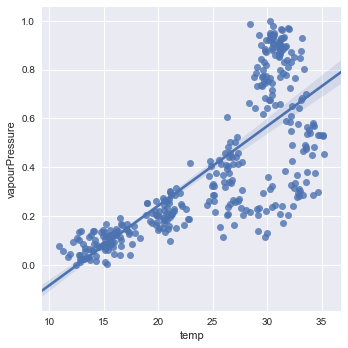

In [75]:
sns.lmplot(x='temp',y='vapourPressure',data=df)

### Exploratory Data Analysis

In [76]:
df.head()

,monthlyTotalRain,temp,windSpeed,cloud,atmPressureStation,atmPressureSea,humidity,vapourPressure
date,,,,,,,,
1986-01-01,0.033166,13.05,0.111111,0.296610,0.933921,0.944334,0.727273,0.023301
1986-02-01,0.269086,15.70,0.469136,0.491525,0.830396,0.834990,0.663636,0.085437
1986-03-01,0.141427,20.50,0.592593,0.559322,0.667401,0.664016,0.527273,0.182524
1986-04-01,0.092616,26.45,0.802469,0.474576,0.466960,0.459245,0.227273,0.209709
1986-05-01,0.128285,29.65,0.691358,0.398305,0.310573,0.304175,0.209091,0.295146


First of all we will try to Vizulize the distribution of data set by the CDF and PDF respectively.

In [77]:
def ecdf(val):
    n=len(val)
    x=np.sort(val)
    y=np.arange(1,n+1)/float(n)
    return x,y

Cdf function is for ploting the single cdf and cdf_size function is for simulated cdf ploting.

In [78]:
def cdf(df,col):
    x,y=ecdf(df[col])
    sns.set()
    plt.plot(x,y)
    m=np.mean(df[col])
    st=np.std(df[col])
    sample=np.random.normal(m,st,len(df[col]))
    percent=np.array([5,25,50,75,95])
    per=np.percentile(df[col],percent)
    x_sim,y_sim = ecdf(sample) 
    plt.plot(x_sim,y_sim,marker='.',linestyle='none')
    plt.plot(per,percent/100.0,marker='D',linestyle='none')
    plt.margins(0.02)
    plt.xlabel(col)
    plt.ylabel('CDF')
    plt.show()

In [79]:
def cdf_size(df,col,size):
    x,y=ecdf(df[col])
    sns.set()
    plt.plot(x,y)
    m=np.mean(df[col])
    st=np.std(df[col])
    for i in range(size):
        sample=np.random.normal(m,st,len(df[col]))
        x_sim,y_sim = ecdf(sample)
        plt.plot(x_sim,y_sim,marker='.',linestyle='none',alpha=0.8)
    percent=np.array([5,25,50,75,95])
    per=np.percentile(df[col],percent)
    plt.plot(per,percent/100.0,marker='D',linestyle='none')
    plt.margins(0.02)
    plt.xlabel(col)
    plt.ylabel('CDF')
    plt.show()

We will use the bootstrap to visulize the PDF of data.

In [80]:
def bootRep(data,func):
    sample=np.random.choice(data,len(data))
    return func(sample)

In [81]:
def dist(data,col,func,size):
    rep=np.empty(size)
    for i in range(size):
        rep[i]=bootRep(df[col],func)
    plt.hist(rep,bins=30,normed=True)
    plt.xlabel(col)
    plt.ylabel('PDF')
    plt.show()

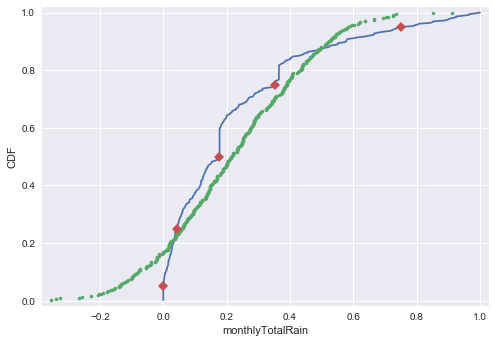

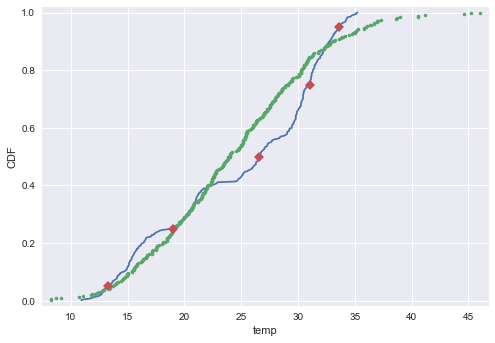

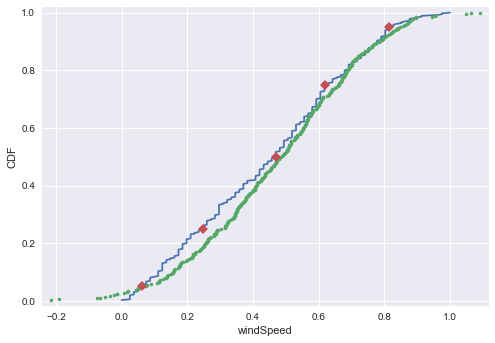

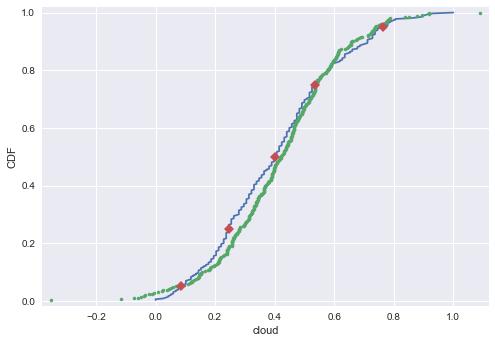

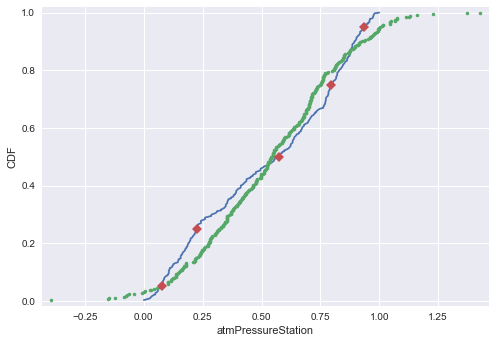

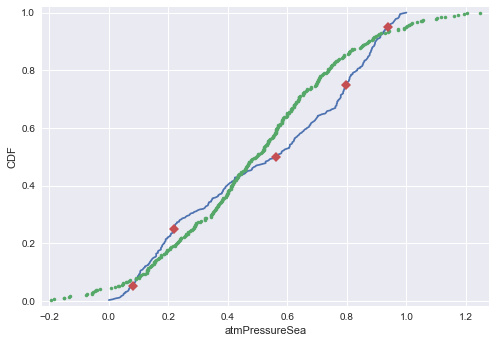

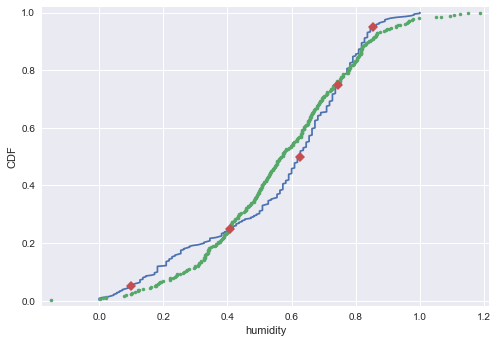

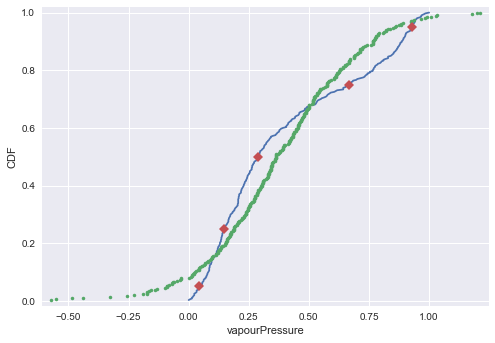

In [82]:
for col in df.columns:
    cdf(df,col)

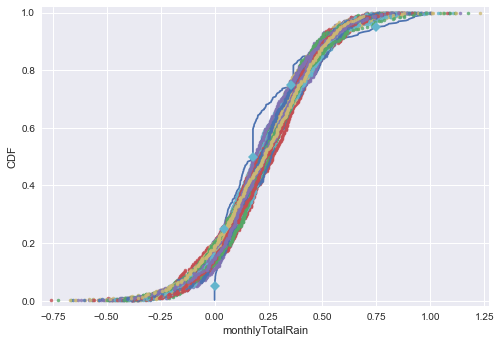

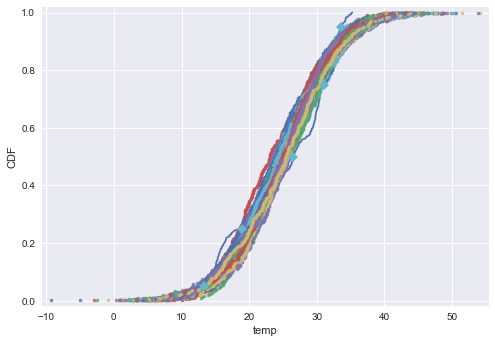

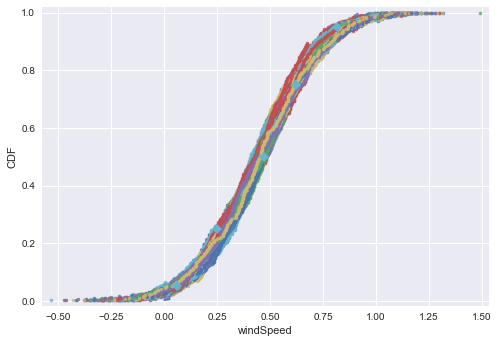

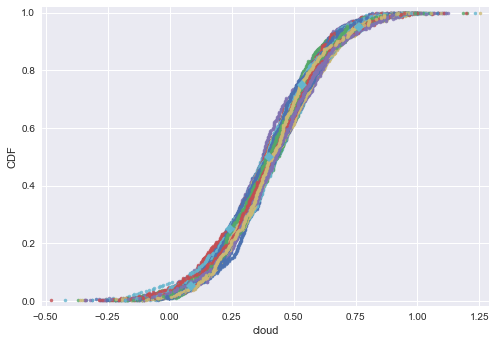

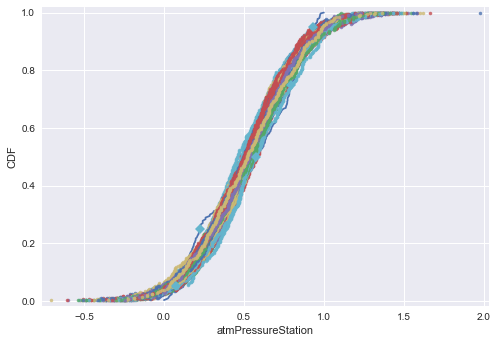

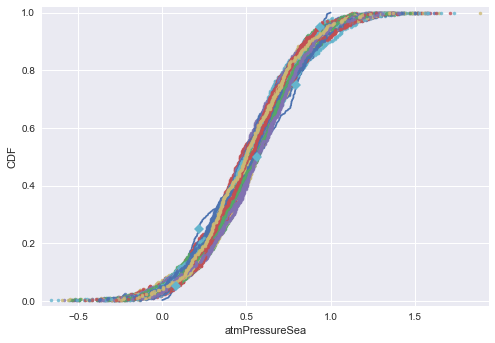

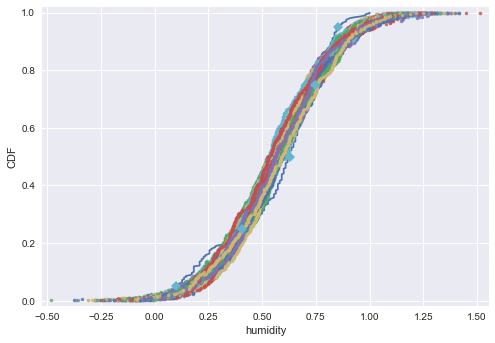

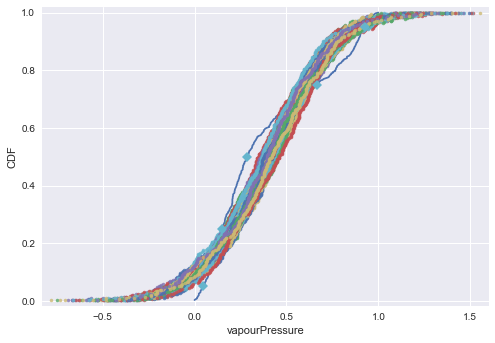

In [83]:
for col in df.columns:
    cdf_size(df,col,100)

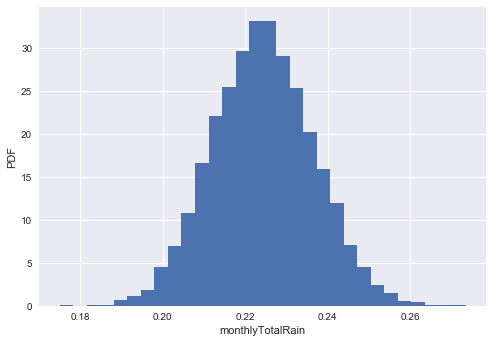

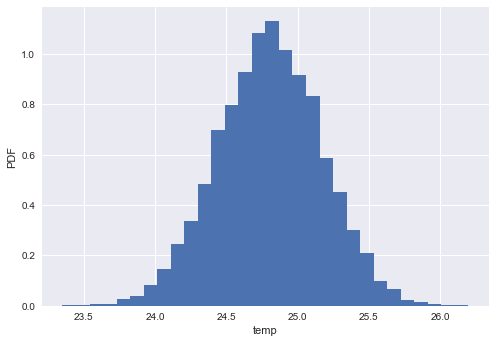

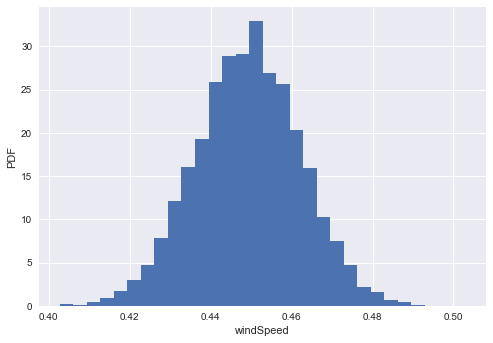

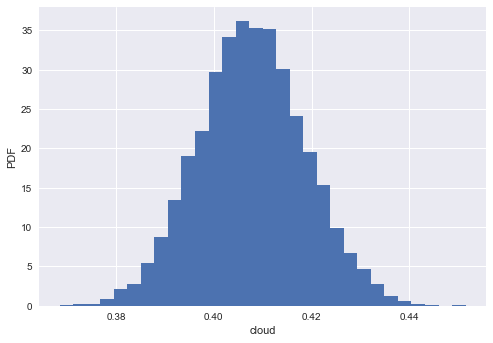

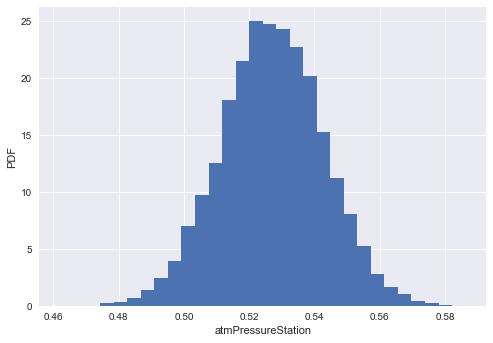

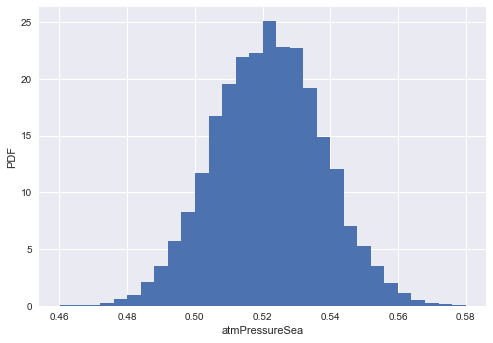

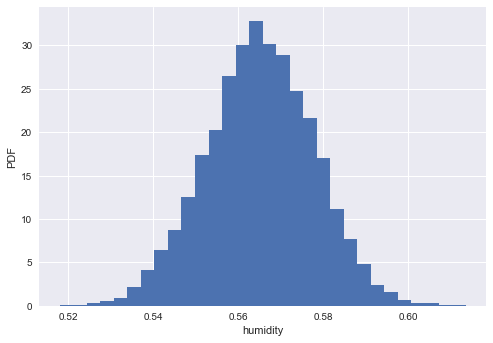

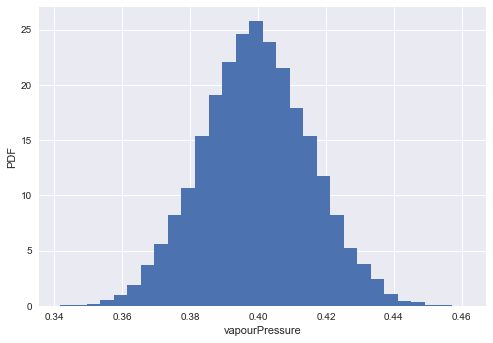

In [84]:
for col in df.columns:
    dist(df,col,np.mean,10000)

In [85]:
#### Archive
def linReg(df,col):
   if col!='temp':
        plt.plot(df['temp'],df[col],marker='.',linestyle='none')
        slop,intr=np.polyfit(df['temp'],df[col],1)
        x=np.array([min(df['temp']),max(df['temp'])])
        y=intr+slop*x
        plt.plot(x,y)
        plt.xlabel('temp')
        plt.ylabel(col)
        plt.margins(0.02)
        plt.show()
   else:
        None

In [86]:
def linReg(df,col,level):
    if col!='temp':
        if level==1:
            plt.plot(df['temp'],df[col],marker='.',linestyle='none')
            z=np.polyfit(df['temp'],df[col],level)
            p=np.poly1d(z)
            x=np.array([min(df['temp']),max(df['temp'])])
            y=p(x)
            plt.plot(x,y)
            plt.xlabel('temp')
            plt.ylabel(col)
            plt.title('Simple Regression')
            plt.margins(0.02)
            plt.show()
        else:
            plt.plot(df['temp'],df[col],marker='.',linestyle='none')
            z=np.polyfit(df['temp'],df[col],level)
            p=np.poly1d(z)
            x=np.array([min(df['temp']),max(df['temp'])])
            y=p(x)
            plt.plot(x,y)
            plt.xlabel('temp')
            plt.ylabel(col)
            plt.title('2nd Degree PolyNomial')
            plt.margins(0.02)
            plt.show()
    else:
        None

In [87]:
def linReg_sim(df,col,level,length):
    df1=df.reset_index()
    if col!='temp':
        if level==1:
            temp=df1['temp']
            col1=df1[col]
            plt.plot(temp,col1,marker='.',linestyle='none')
            ind=np.arange(len(temp))
            for i in range(length):
                bs_ind=np.random.choice(ind,len(ind))
                bs_temp=temp[bs_ind]
                bs_col=col1[bs_ind]
                z=np.polyfit(bs_temp,bs_col,level)
                p=np.poly1d(z)
                x=np.array([min(temp),max(temp)])
                y=p(x)
                plt.plot(x,y)
            plt.xlabel('temp')
            plt.ylabel(col)
            plt.title('Simple Regression')
            plt.margins(0.02)
            plt.show()
        else:
            temp=df1['temp']
            col1=df1[col]
            plt.plot(temp,col1,marker='.',linestyle='none')
            ind=np.arange(len(temp))
            for i in range(length):
                bs_ind=np.random.choice(ind,len(ind))
                bs_temp=temp[bs_ind]
                bs_col=col1[bs_ind]
                z=np.polyfit(bs_temp,bs_col,level)
                p=np.poly1d(z)
                x=np.array([min(temp),max(temp)])
                y=p(x)
                plt.plot(x,y)
            plt.xlabel('temp')
            plt.ylabel(col)
            plt.title('2nd Degree PolyNomial')
            plt.margins(0.02)
            plt.show()     
    else:
        None

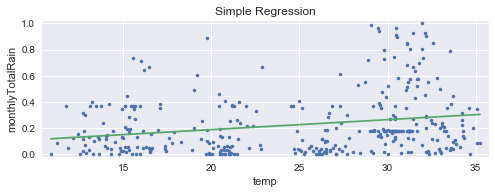

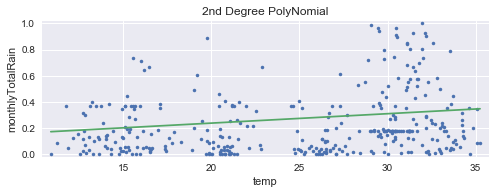

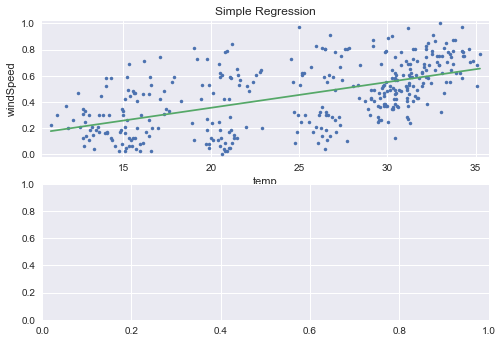

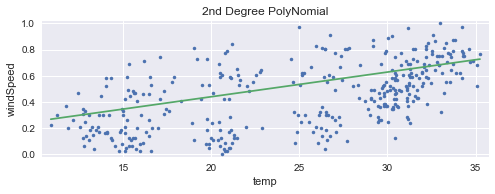

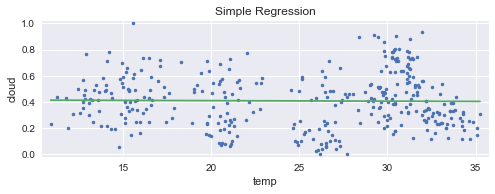

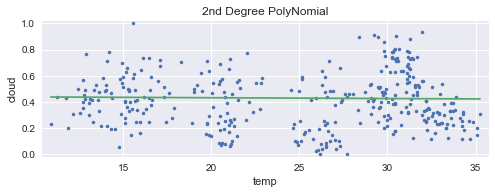

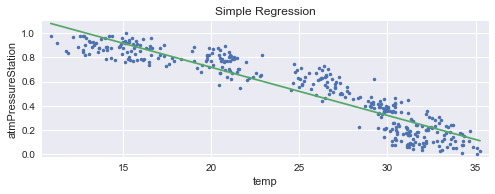

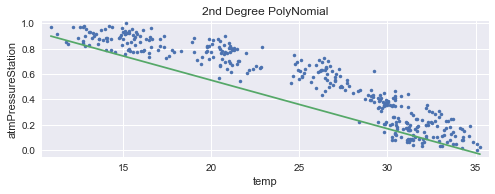

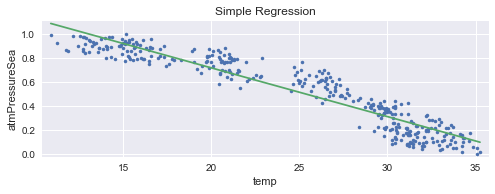

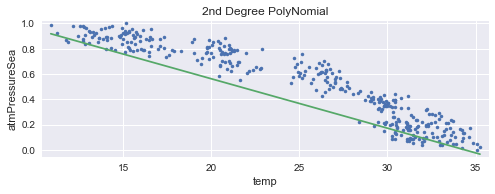

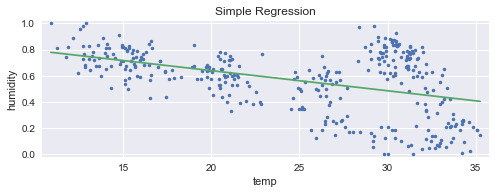

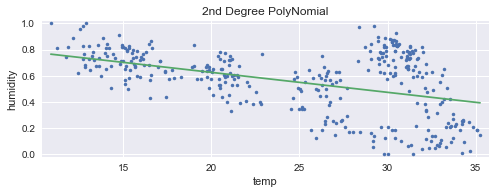

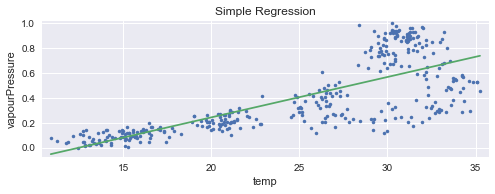

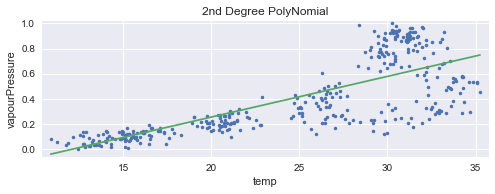

In [88]:
for col in df.columns:
    plt.subplot(2,1,1)
    linReg(df,col,1)
    plt.subplot(2,1,2)
    linReg(df,col,2)

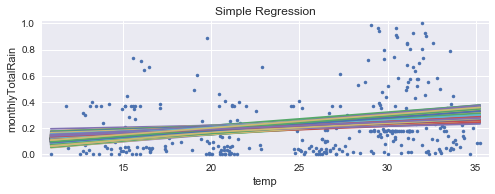

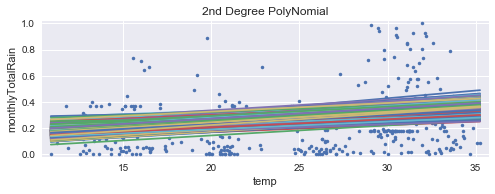

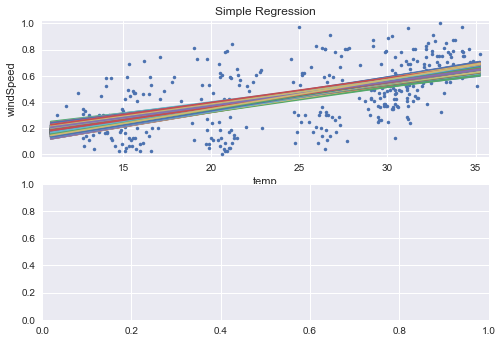

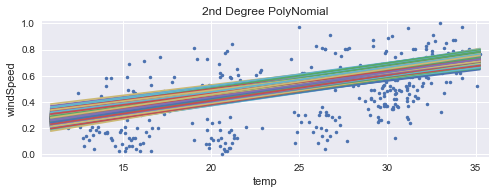

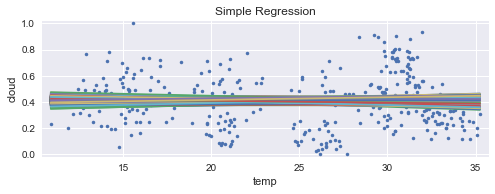

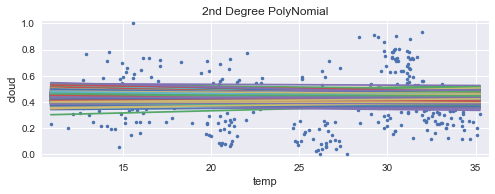

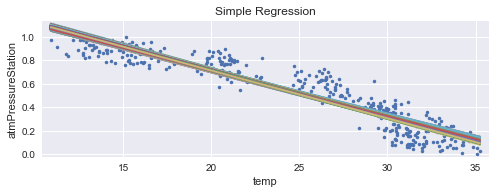

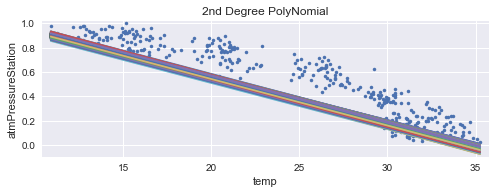

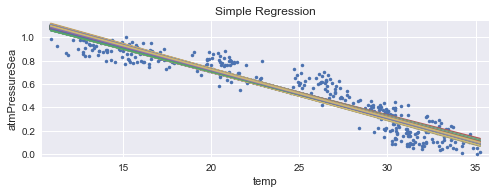

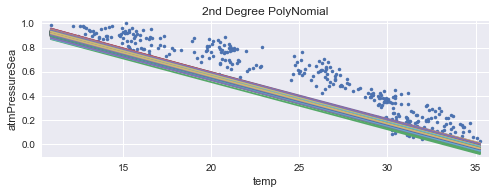

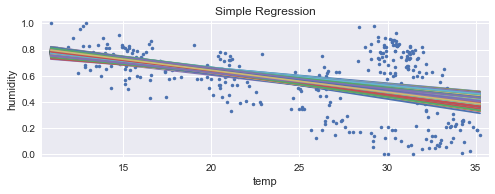

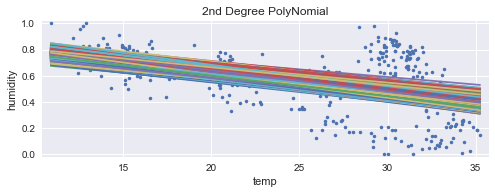

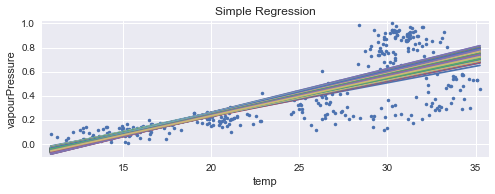

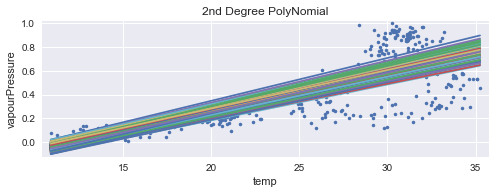

In [89]:
for col in df.columns:
    plt.subplot(2,1,1)
    linReg_sim(df,col,1,1000)
    plt.subplot(2,1,2)
    linReg_sim(df,col,2,1000)

As we have atmPressure at sea and station both have almost same distribution ans regression line so i want to see is there any difference between them or both are same.

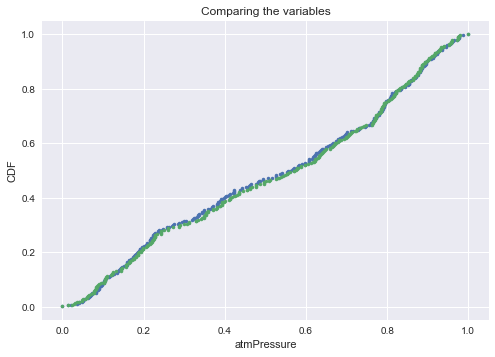

In [90]:
x_sea,y_sea=ecdf(df['atmPressureSea'])
x_sta,y_sta=ecdf(df['atmPressureStation'])
plt.plot(x_sea,y_sea,marker='.',linestyle='none')
plt.plot(x_sta,y_sta,marker='.',linestyle='none')
plt.xlabel('atmPressure')
plt.ylabel('CDF')
plt.title('Comparing the variables')
plt.show()

In [91]:
def permSample(var1,var2):
    #atmPressure=np.concatenate(var1,var2) for arrays
    combine=pd.concat([df[var1],df[var2]]).values # for dataframes
    perm_sample=np.random.permutation(combine)
    sample1=perm_sample[:len(df[var1])]
    sample2=perm_sample[len(df[var1]):]
    return sample1,sample2

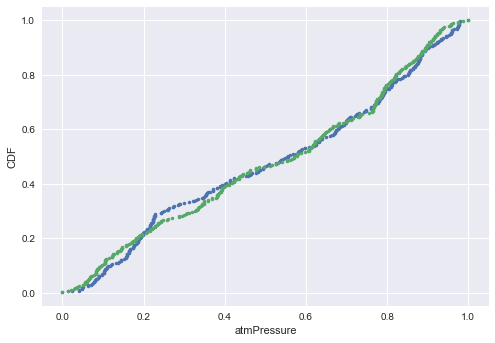

In [92]:
var1='atmPressureSea'
var2='atmPressureStation'
def verf(var1,var2):
    atmPressureSea,atmPressureStation=permSample(var1,var2)
    x_sea,y_sea=ecdf(atmPressureSea)
    x_sta,y_sta=ecdf(atmPressureStation)
    plt.plot(x_sea,y_sea,marker='.',linestyle='none')
    plt.plot(x_sta,y_sta,marker='.',linestyle='none')
    plt.xlabel('atmPressure')
    plt.ylabel('CDF')
    plt.show()
verf(var1,var2)

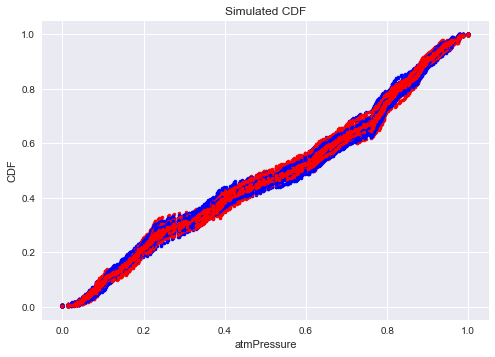

In [93]:
for i in range(50):
    atmPressureSea,atmPressureStation=permSample('atmPressureSea','atmPressureStation')
    x1,y1=ecdf(atmPressureSea)
    x2,y2=ecdf(atmPressureStation)
    plt.plot(x1,y1,color='red',marker='.',linestyle='none')
    plt.plot(x2,y2,color='blue',marker='.',linestyle='none')
x_Sea,y_Sea=ecdf(df['atmPressureSea'])
x_sta,y_sta=ecdf(df['atmPressureStation'])
plt.plot(x_Sea,y_Sea,color='red',marker='.',linestyle='none')
plt.plot(x_sta,y_sta,color='red',marker='.',linestyle='none')
plt.xlabel('atmPressure')
plt.ylabel('CDF')
plt.title('Simulated CDF')
plt.show()

In [94]:
df[['atmPressureSea','atmPressureStation']].describe()

,atmPressureSea,atmPressureStation
count,360.000000,360.000000
mean,0.522034,0.527062
std,0.300231,0.298705
min,0.000000,0.000000
25%,0.218688,0.224670
50%,0.562624,0.572687
75%,0.795726,0.795705
max,1.000000,1.000000


In [95]:
np.mean(df['atmPressureSea'])-np.mean(df['atmPressureStation'])

-0.005027458839717003

In [96]:
var1='atmPressureSea'
var2='atmPressureStation'
atmPressureSea,atmPressureStation=permSample(var1,var2)
np.mean(atmPressureSea)-np.mean(atmPressureStation)

0.035840184054751423

In [97]:
def perm_replic(v1,v2,func,size):
    rep=np.empty(size)
    for i in range(size):
        sample1,sample2=permSample(v1,v2)
        rep[i]=func(sample1,sample2)
    return rep

In [98]:
def dif_mean(data1,data2):
    dif=np.mean(data1)-np.mean(data2)
    return dif

In [99]:
original_dif=dif_mean(df['atmPressureSea'],df['atmPressureStation'])
original_dif

-0.005027458839717003

In [100]:
perm_dif=perm_replic('atmPressureSea','atmPressureStation',dif_mean,1000)

In [101]:
p=np.sum(perm_dif<=original_dif)/float(len(perm_dif))
print 'p value is',p

p value is 0.379


So there are almost 43% chances that the permutation difference between both atmosepher pressures could be less then or equal to the original differnce but the original difference is quite low.

At last lets try bootstrap tests for verification.
<br> First we will test for identical distribution
<br> secondly we will run two sample bootstrap hypothesis test

In [102]:
atmPressure_concat=pd.concat([df['atmPressureSea'],df['atmPressureStation']]).values
rep=np.empty(1000)
for i in range(1000):
    sample=np.random.choice(atmPressure_concat,len(atmPressure_concat))
    rep[i]=dif_mean(sample[:len(df['atmPressureSea'])],sample[len(df['atmPressureStation']):])
np.sum(rep<original_dif)/1000.0

0.42999999999999999

The p value here is quite good which shows that 43% of the differences are less the the original difference.

In [103]:
def draw_bs_rep(data,func,size):
    rep=np.empty(size)
    for i in range(size):
        rep[i]=bootRep(data,func)
        return rep

In [104]:
# As we have conducted the atmPressure_concat so
atmPressure_mean=np.mean(atmPressure_concat)
atmPressureSea=df['atmPressureSea'].values
atmPressureSea=atmPressureSea-np.mean(atmPressureSea)+atmPressure_mean
atmPressureStation=df['atmPressureStation'].values
atmPressureStation=atmPressureStation-np.mean(atmPressureStation)+atmPressure_mean

In [105]:
rep_atmSea=draw_bs_rep(atmPressureSea,np.mean,1000)
rep_atmStation=draw_bs_rep(atmPressureStation,np.mean,1000)
atm_repDif=rep_atmSea-rep_atmStation
np.sum(atm_repDif<original_dif)/1000.0

0.23200000000000001

The P value is quite low so we can say that both variables have identical distributions and no difference in them.

In [106]:
df.drop(['atmPressureSea'],axis=1,inplace=True)

In [107]:
df.rename(columns={'atmPressureStation':'atmPressure'},inplace=True)

In [108]:
df.head()

,monthlyTotalRain,temp,windSpeed,cloud,atmPressure,humidity,vapourPressure
date,,,,,,,
1986-01-01,0.033166,13.05,0.111111,0.296610,0.933921,0.727273,0.023301
1986-02-01,0.269086,15.70,0.469136,0.491525,0.830396,0.663636,0.085437
1986-03-01,0.141427,20.50,0.592593,0.559322,0.667401,0.527273,0.182524
1986-04-01,0.092616,26.45,0.802469,0.474576,0.466960,0.227273,0.209709
1986-05-01,0.128285,29.65,0.691358,0.398305,0.310573,0.209091,0.295146


In [109]:
corr=df.corr(method='pearson', min_periods=1)
corr

,monthlyTotalRain,temp,windSpeed,cloud,atmPressure,humidity,vapourPressure
monthlyTotalRain,1.000000,0.229091,0.200379,0.350798,-0.327126,0.215262,0.434547
temp,0.229091,1.000000,0.563112,-0.013614,-0.932309,-0.447289,0.761727
windSpeed,0.200379,0.563112,1.000000,0.230659,-0.627495,-0.549889,0.277248
cloud,0.350798,-0.013614,0.230659,1.000000,-0.175722,0.395267,0.323817
atmPressure,-0.327126,-0.932309,-0.627495,-0.175722,1.000000,0.331267,-0.804468
humidity,0.215262,-0.447289,-0.549889,0.395267,0.331267,1.000000,0.220593
vapourPressure,0.434547,0.761727,0.277248,0.323817,-0.804468,0.220593,1.000000


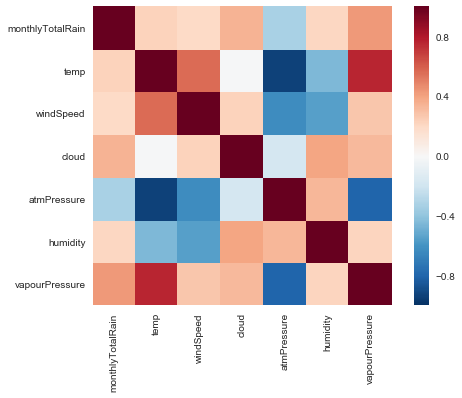

In [110]:
sns.heatmap(corr,square=True)

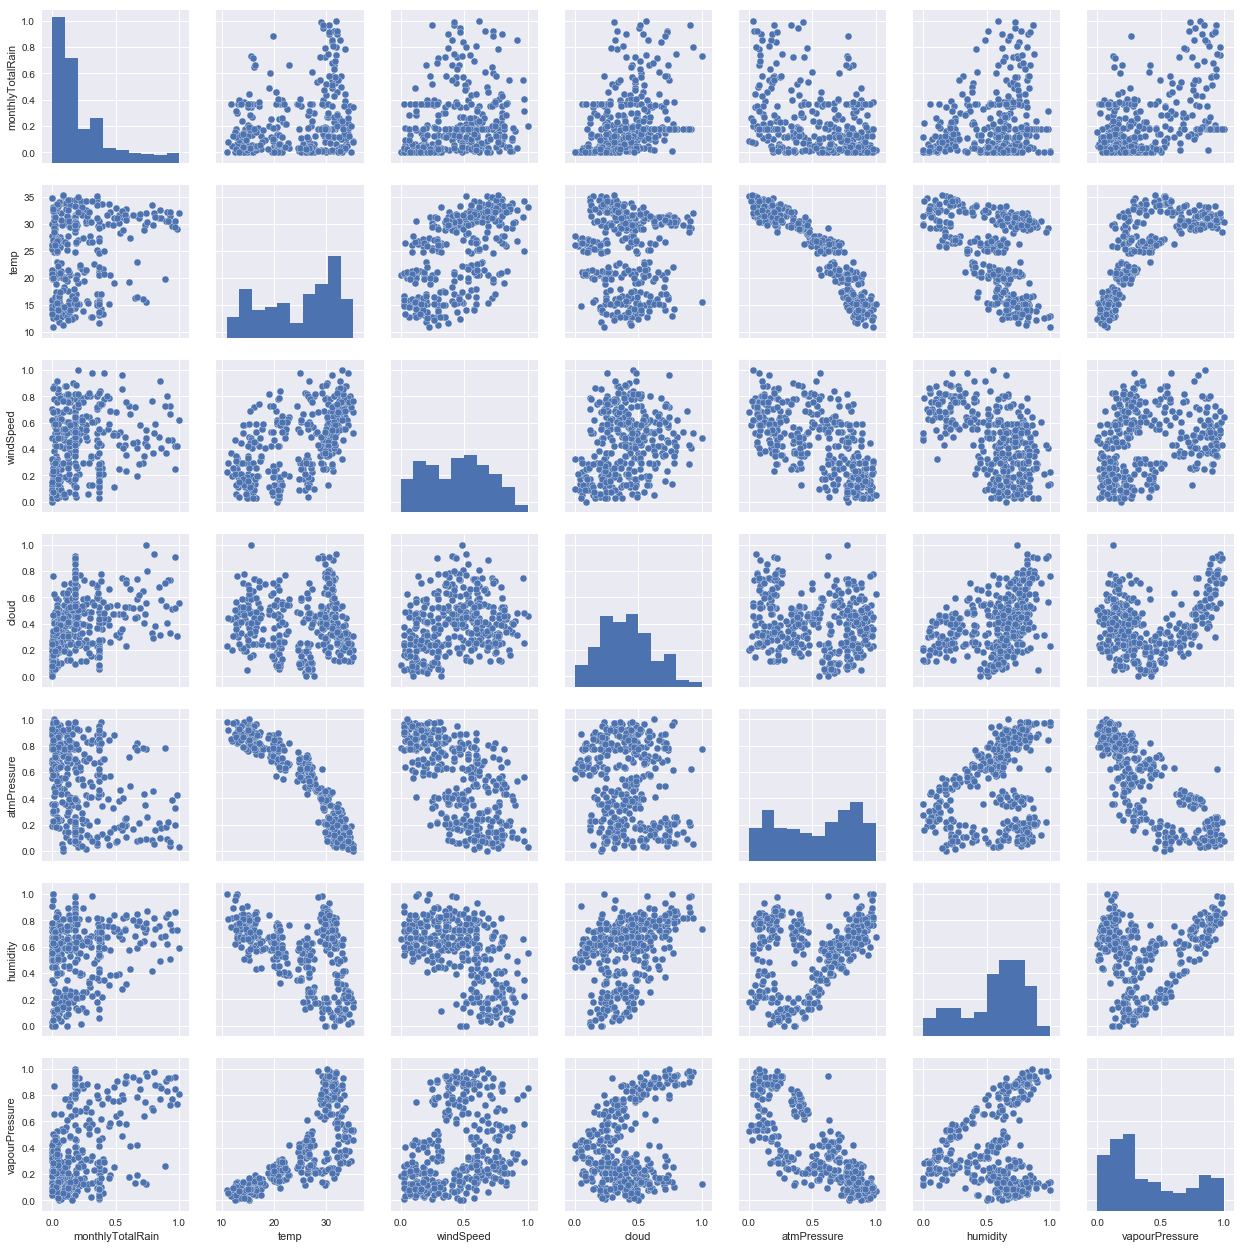

In [111]:
sns.pairplot(df)

As we have visulize the correlation but we have to varify the values of these correlations.

In [112]:
def corrPlot(col):
    if col!='temp':
        sns.lmplot(x='temp',y=col,data=df,fit_reg=False)
        plt.xlabel('Temprature')
        plt.ylabel(col)
        plt.margins(0.02)
        plt.show()
    else:
        None

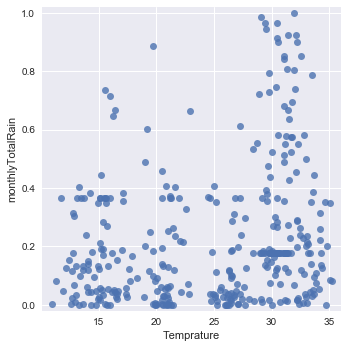

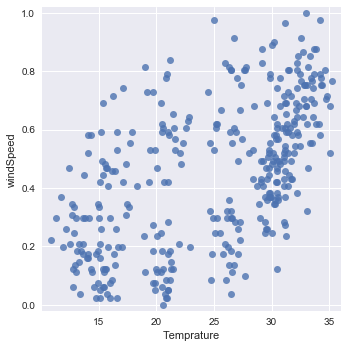

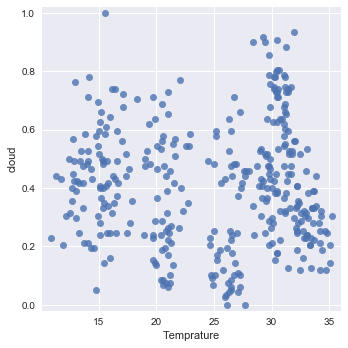

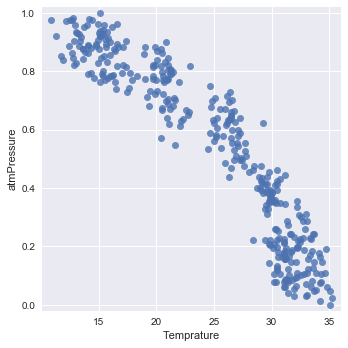

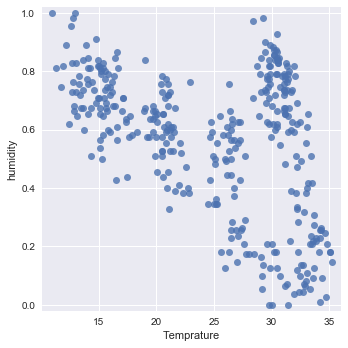

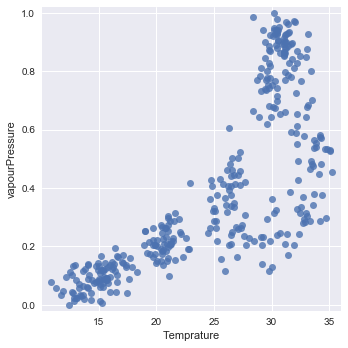

In [113]:
for col in df.columns:
    corrPlot(col)


In [114]:
def bootSpCor(x,y,size):
    inds=np.arange(len(x))
    bs_rep=np.empty(size)
    for i in range(size):
        bs_inds=np.random.choice(inds,len(inds))
        bs_x,bs_y=x[bs_inds],y[bs_inds]
        bs_rep[i]=pearsonr(bs_x,bs_y)[0]
    return bs_rep

In [115]:
for col in df.columns:
    if col != 'temp':
        orignalCor=pearsonr(df['temp'],df[col])[0]
        bs_rep=bootSpCor(df['temp'],df[col],10)
        confidence=np.percentile(bs_rep,[2.5,97.5])
        print 'The correlation of temperature with '+col+' is ',orignalCor,'with confidence interval',confidence

The correlation of temperature with monthlyTotalRain is  0.229090667958 with confidence interval [ 0.18267098  0.2714206 ]
The correlation of temperature with windSpeed is  0.563111895474 with confidence interval [ 0.49709828  0.61774265]
The correlation of temperature with cloud is  -0.0136135098346 with confidence interval [-0.0804416   0.06256027]
The correlation of temperature with atmPressure is  -0.932308832767 with confidence interval [-0.93217898 -0.92273633]
The correlation of temperature with humidity is  -0.447289039963 with confidence interval [-0.49645337 -0.37852723]
The correlation of temperature with vapourPressure is  0.761727466071 with confidence interval [ 0.7437407   0.79433329]


So the above values lies in the confidence interval so we can reley on these correlation values.

## Machine Learning
<br>
Now we will try to find out that is there any relation between temprature and months.
<br>

In [140]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [117]:
df.head()

,monthlyTotalRain,temp,windSpeed,cloud,atmPressure,humidity,vapourPressure
date,,,,,,,
1986-01-01,0.033166,13.05,0.111111,0.296610,0.933921,0.727273,0.023301
1986-02-01,0.269086,15.70,0.469136,0.491525,0.830396,0.663636,0.085437
1986-03-01,0.141427,20.50,0.592593,0.559322,0.667401,0.527273,0.182524
1986-04-01,0.092616,26.45,0.802469,0.474576,0.466960,0.227273,0.209709
1986-05-01,0.128285,29.65,0.691358,0.398305,0.310573,0.209091,0.295146


In [118]:
monthDF = df.reset_index()

In [119]:
monthDF['months']=monthDF.date.map(lambda x: x.strftime('%B'))

In [120]:
monthDF.head()

,date,monthlyTotalRain,temp,windSpeed,cloud,atmPressure,humidity,vapourPressure,months
0,1986-01-01,0.033166,13.05,0.111111,0.296610,0.933921,0.727273,0.023301,January
1,1986-02-01,0.269086,15.70,0.469136,0.491525,0.830396,0.663636,0.085437,February
2,1986-03-01,0.141427,20.50,0.592593,0.559322,0.667401,0.527273,0.182524,March
3,1986-04-01,0.092616,26.45,0.802469,0.474576,0.466960,0.227273,0.209709,April
4,1986-05-01,0.128285,29.65,0.691358,0.398305,0.310573,0.209091,0.295146,May


In [121]:
monthNorm=monthDF.copy(deep=True)
min_value=monthNorm['temp'].min()
max_value=monthNorm['temp'].max()
monthNorm['temp'] = (monthNorm['temp'] - min_value) / (max_value - min_value)

In [122]:
monthNorm.drop(['date'],axis=1,inplace=True)

In [123]:
monthNorm.head()

,monthlyTotalRain,temp,windSpeed,cloud,atmPressure,humidity,vapourPressure,months
0,0.033166,0.088296,0.111111,0.296610,0.933921,0.727273,0.023301,January
1,0.269086,0.197125,0.469136,0.491525,0.830396,0.663636,0.085437,February
2,0.141427,0.394251,0.592593,0.559322,0.667401,0.527273,0.182524,March
3,0.092616,0.638604,0.802469,0.474576,0.466960,0.227273,0.209709,April
4,0.128285,0.770021,0.691358,0.398305,0.310573,0.209091,0.295146,May


In [135]:
y=monthNorm['months'].values
X=monthNorm.drop(['months'],axis=1).values

In [136]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23,stratify=y)

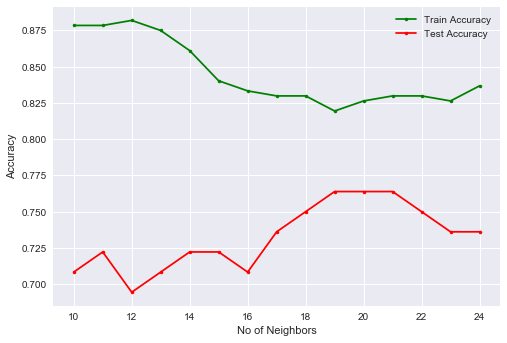

In [137]:
neighbors=np.arange(10,25)
train=np.empty(len(neighbors))
test=np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train[i]=knn.score(X_train,y_train)
    test[i]=knn.score(X_test,y_test)
plt.plot(neighbors,train,marker='.',color='g',label='Train Accuracy')
plt.plot(neighbors,test,marker='.',color='r',label='Test Accuracy')
plt.xlabel('No of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

From above plot we can see that the maximum accuracy is achived on 19 to 21 so we can take any of them but 20 would be better as it have more train accuracy.

In [138]:
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
v=knn.score(X_test,y_test)
print 'R square value is: ',v

R square value is:  0.763888888889


In [143]:
y_pred=knn.predict(X_test)
print "The confusion matrix is: \n",(confusion_matrix(y_test,y_pred))

The confusion matrix is: 
[[6 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 3 0 0 0 0 0 1]
 [0 0 6 0 0 0 0 0 0 0 0 0]
 [0 0 1 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 1 0 0 0 0 0 0 0]
 [0 2 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 6 0 0 0 0 0]
 [0 0 0 0 0 0 0 5 0 0 1 0]
 [1 0 0 0 0 0 1 1 3 0 0 0]
 [0 0 0 0 0 0 0 0 0 6 0 0]
 [0 0 0 1 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 0 0 6]]


In [144]:
print (classification_report(y_test,y_pred))

             precision    recall  f1-score   support

      April       0.86      1.00      0.92         6
     August       0.50      0.33      0.40         6
   December       0.50      1.00      0.67         6
   February       0.83      0.83      0.83         6
    January       1.00      0.17      0.29         6
       July       0.57      0.67      0.62         6
       June       0.86      1.00      0.92         6
      March       0.83      0.83      0.83         6
        May       1.00      0.50      0.67         6
   November       1.00      1.00      1.00         6
    October       0.83      0.83      0.83         6
  September       0.86      1.00      0.92         6

avg / total       0.80      0.76      0.74        72



In [128]:
y=monthDF['temp'].values
X=monthDF.drop(['temp','date','months'],axis=1).values
# for reshaping the data
#X=X.reshape(-1,df.shape[1])
#print X
#y=y.reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23)
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
rSq=reg.score(X_test,y_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print 'So the value of R square is: ',rSq, 'and root mean square error value is: ',rmse

So the value of R square is:  0.983638219597 and root mean square error value is:  0.829153822053


In [129]:
np.column_stack((reg.predict(X_test),y_pred))[:10]

array([[ 29.85652189,  29.85652189],
       [ 29.02419222,  29.02419222],
       [ 33.32800672,  33.32800672],
       [ 26.80028388,  26.80028388],
       [ 15.44127669,  15.44127669],
       [ 24.93364059,  24.93364059],
       [ 33.5193027 ,  33.5193027 ],
       [ 21.27960393,  21.27960393],
       [ 17.43812888,  17.43812888],
       [ 21.30105092,  21.30105092]])

In [130]:
RSq=cross_val_score(reg,X_train,y_train,cv=10)
print 'mean value of cross validation is: ',np.mean(RSq)

mean value of cross validation is:  0.980762911379


We had implimented the KNN and regression on the data to predict the temperature on the basis of other variables with good R square values.

In next section we will impliment the time series model to predict the temprature change on the basis of time.

In [ ]:
def df_subSet(df,List):
    Df=df.reset_index()
    Df['date']=Df.date.dt.year
    Df = Df[Df.date.isin(List)]
    return Df
#sub_df=df_subSet(df,List=[1986,1990,2000,2010,2015])